# Olivetti faces

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_olivetti_faces
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection  import GridSearchCV

In [2]:
olivetti = fetch_olivetti_faces()
X, Y = olivetti.data, olivetti.target

In [3]:
#Normalizando los datos a una escala [0,1]
X = np.asarray( X, 'float32')
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

In [4]:
logistic = LogisticRegression(C=10)
rbm = BernoulliRBM(n_components=180, learning_rate=0.01, batch_size=10, n_iter=50, verbose=True, random_state=None)

clf = Pipeline(steps=[('rbm', rbm), ('clf', logistic)])
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)
clf.fit(X_train,Y_train) 
Y_pred = clf.predict(X_test)
print ('Score:  ',(metrics.classification_report(Y_test, Y_pred)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -2733.38, time = 0.99s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2747.37, time = 0.68s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2762.94, time = 0.53s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2693.41, time = 0.55s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2699.76, time = 0.57s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2673.16, time = 0.55s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2682.59, time = 0.59s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2700.79, time = 0.53s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2706.24, time = 0.55s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2620.46, time = 0.53s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -2646.07, time = 0.55s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -2654.50, time = 0.52s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -2702.37, time = 0.54s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -2668.48, time = 0.52s
[

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

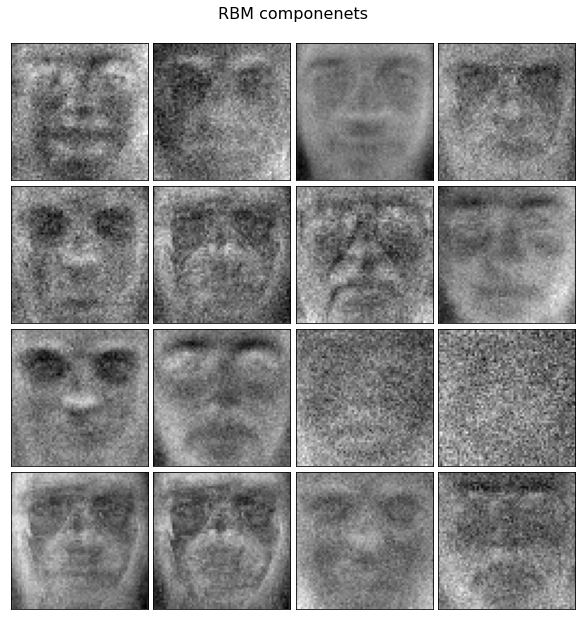

In [5]:
comp = rbm.components_
image_shape = (64, 64)

def plot_gallery(title, images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()  
    
plot_gallery('RBM componenets', comp[:16], 4,4)

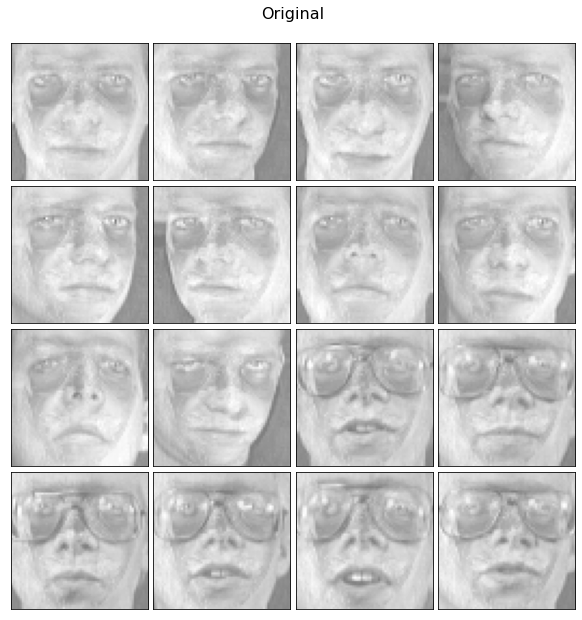

In [6]:
plot_gallery('Original', X[:16], 4,4)